# Heart Disease Prediction Draft

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-Processing

### Import into Data Frame
Data Set with All Four Locations

In [16]:
# Load dataset into a dataframe
heart_df = pd.read_csv('heart_disease_uci.csv')

# Display the first 10 rows of the dataset
heart_df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


<Axes: >

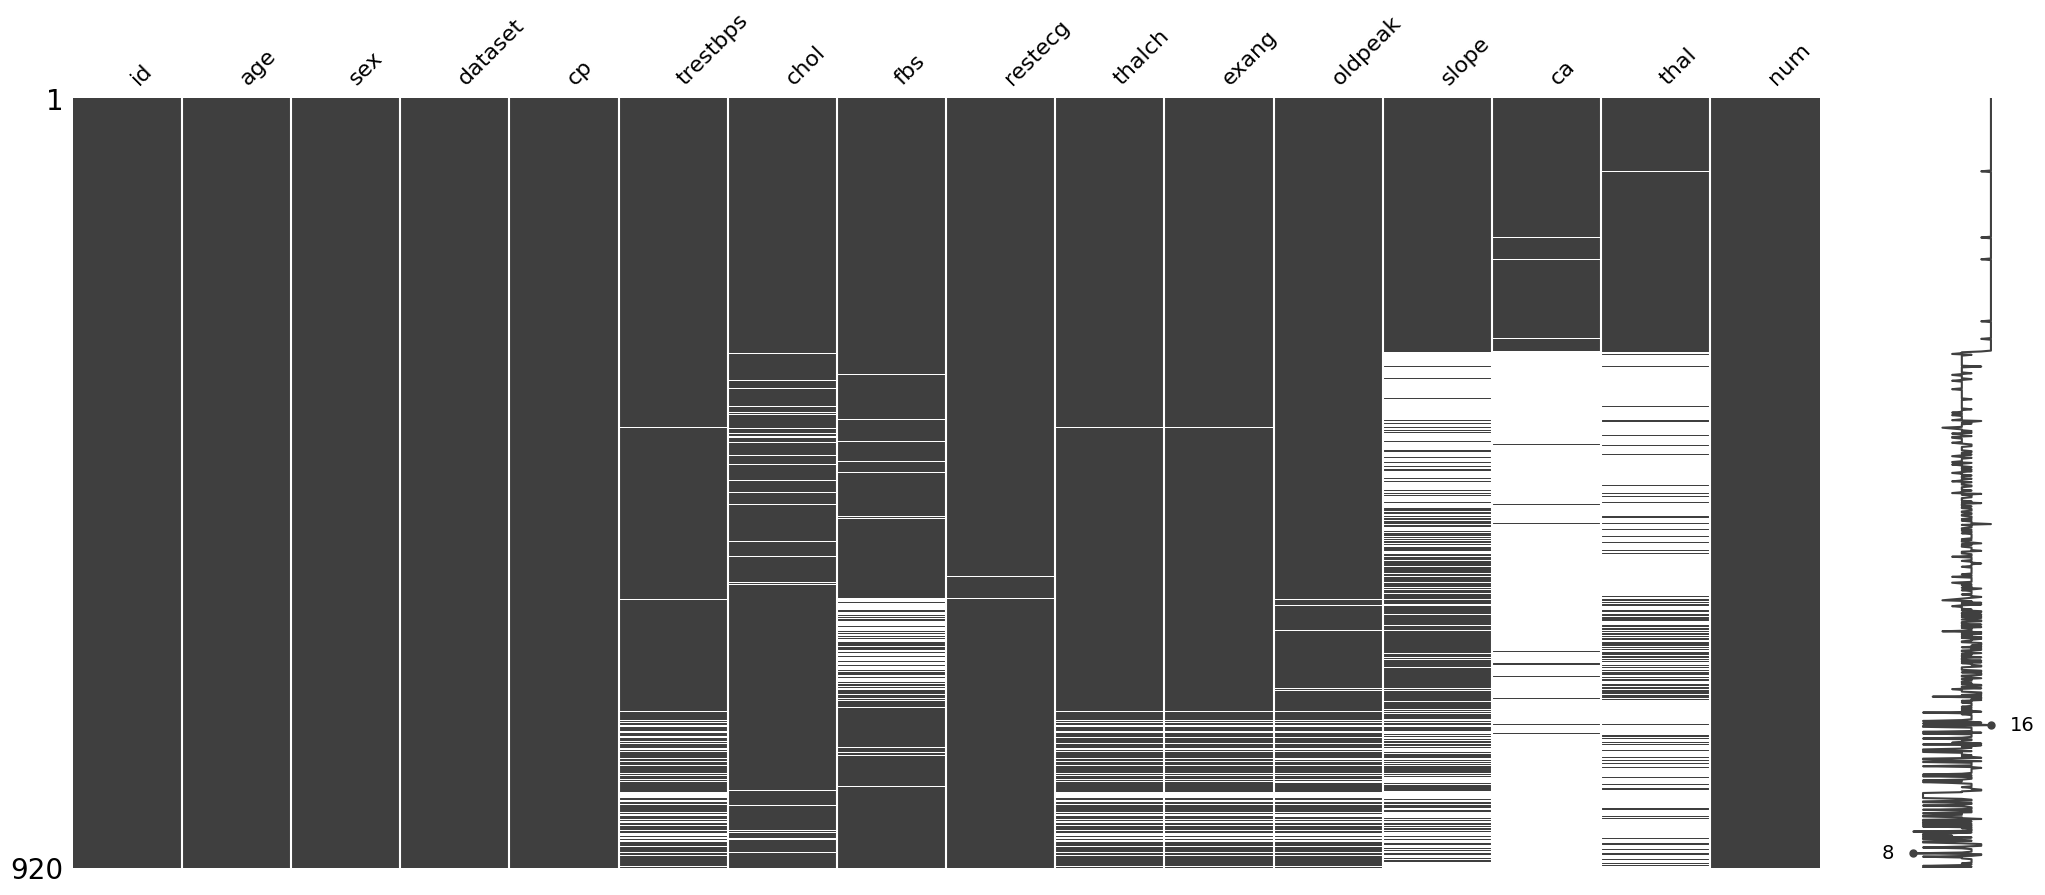

In [3]:
heart_df.info()

# Visualize missing data
msno.matrix(heart_df)


### Import into Data Frame
Data from Cleveland

In [4]:
# Load dataset into a dataframe
cleveland_df = pd.read_csv('heart_disease_uci_cleveland.csv')

# Display the first 10 rows of the dataset
cleveland_df.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
294,295,63,Female,Cleveland,asymptomatic,124,197,False,normal,136,True,0.0,flat,0.0,normal,1
295,296,41,Male,Cleveland,atypical angina,120,157,False,normal,182,False,0.0,upsloping,0.0,normal,0
296,297,59,Male,Cleveland,asymptomatic,164,176,True,lv hypertrophy,90,False,1.0,flat,2.0,fixed defect,3
297,298,57,Female,Cleveland,asymptomatic,140,241,False,normal,123,True,0.2,flat,0.0,reversable defect,1
298,299,45,Male,Cleveland,typical angina,110,264,False,normal,132,False,1.2,flat,0.0,reversable defect,1
299,300,68,Male,Cleveland,asymptomatic,144,193,True,normal,141,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130,131,False,normal,115,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130,236,False,lv hypertrophy,174,False,0.0,flat,1.0,normal,1
302,303,38,Male,Cleveland,non-anginal,138,175,False,normal,173,False,0.0,upsloping,NaN,normal,0
303,304,28,Male,Cleveland,atypical angina,130,132,False,lv hypertrophy,185,False,0.0,NaN,NaN,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        304 non-null    int64  
 1   age       304 non-null    int64  
 2   sex       304 non-null    object 
 3   dataset   304 non-null    object 
 4   cp        304 non-null    object 
 5   trestbps  304 non-null    int64  
 6   chol      304 non-null    int64  
 7   fbs       304 non-null    bool   
 8   restecg   304 non-null    object 
 9   thalch    304 non-null    int64  
 10  exang     304 non-null    bool   
 11  oldpeak   304 non-null    float64
 12  slope     303 non-null    object 
 13  ca        299 non-null    float64
 14  thal      301 non-null    object 
 15  num       304 non-null    int64  
dtypes: bool(2), float64(2), int64(6), object(6)
memory usage: 34.0+ KB
None
              id         age    trestbps        chol      thalch     oldpeak  \
count  304.00000  304.000000  304.00

<Axes: >

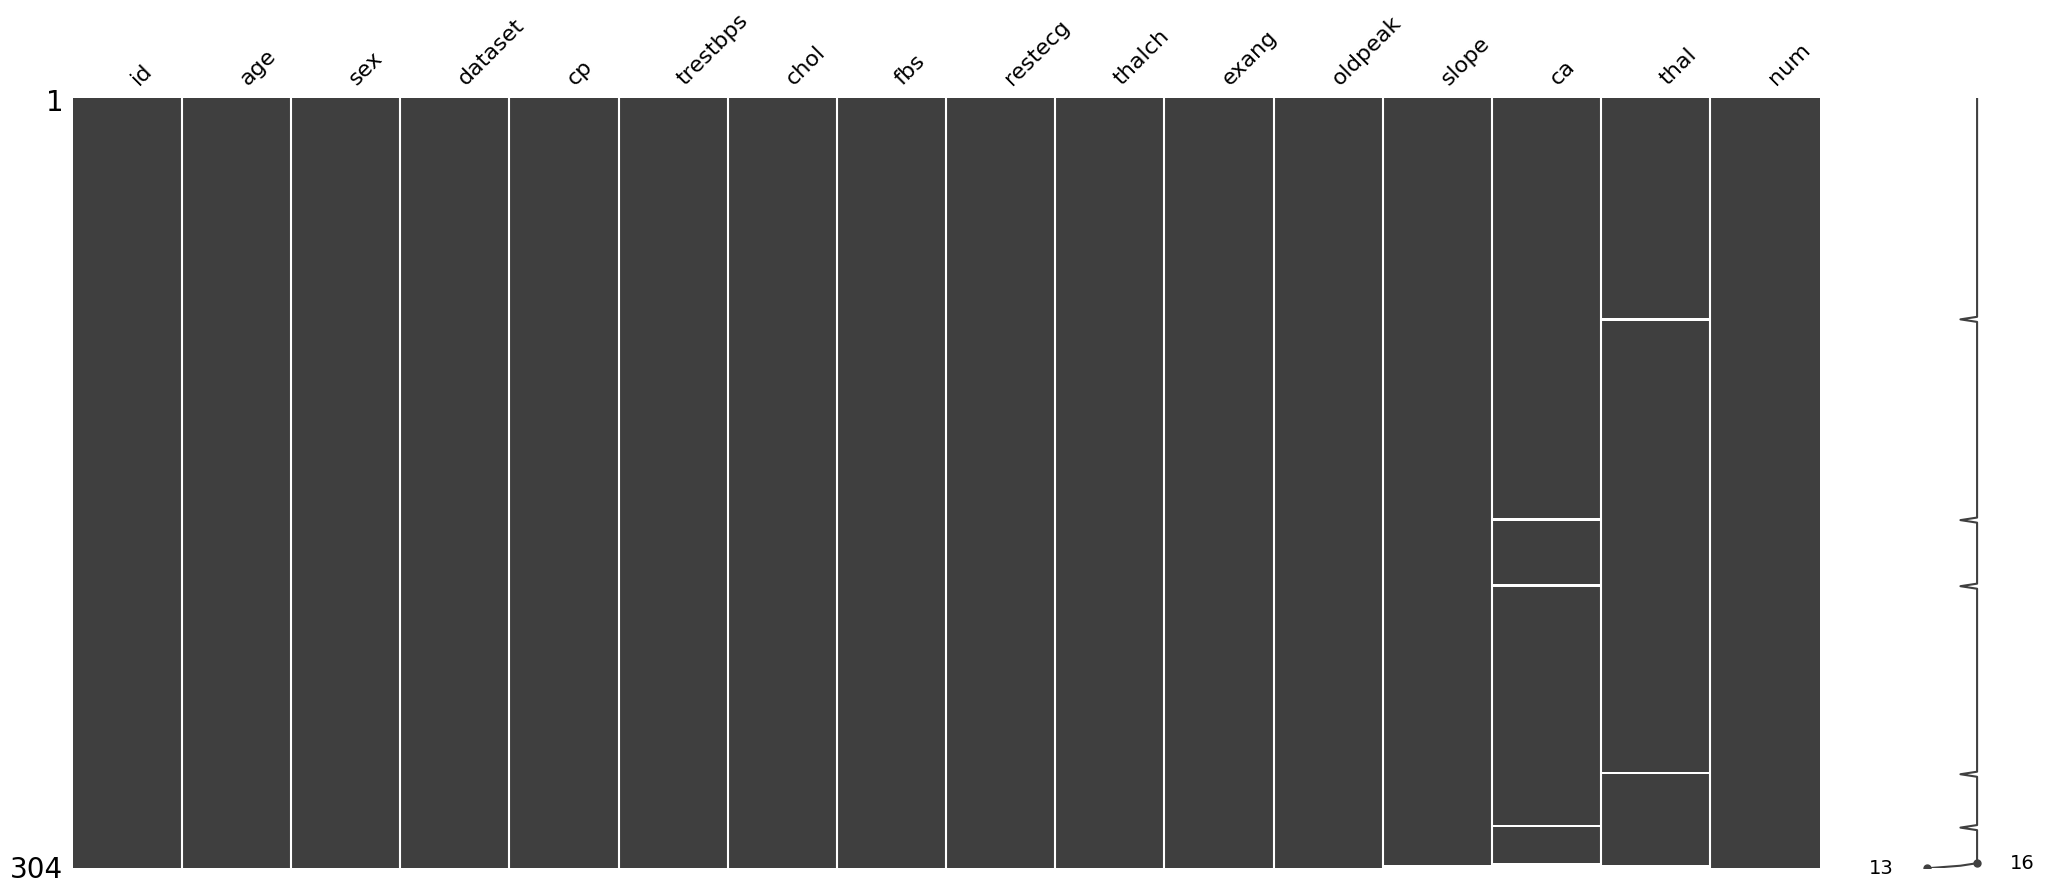

In [5]:
print(cleveland_df.info()) # checks data types and number of non-null values
print(cleveland_df.describe()) # statistical values given
print(cleveland_df.isnull().sum()) # add up total null values

# Visualize missing data
msno.matrix(cleveland_df)


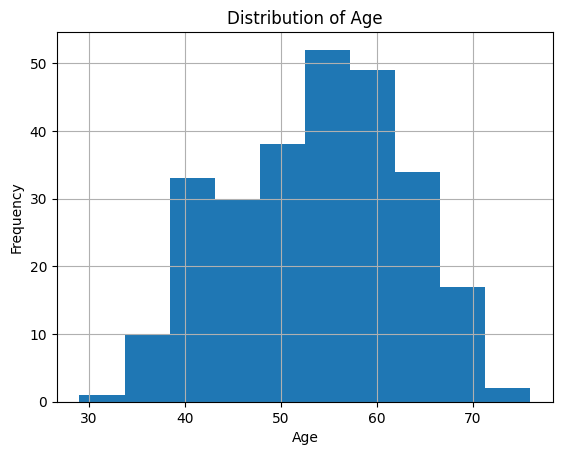

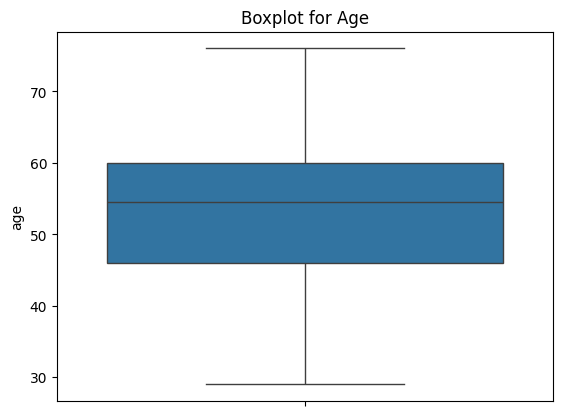

In [ ]:

# Histogram for 'age'
cleveland_df['age'].hist(bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['age'])
plt.title('Boxplot for Age')
plt.show()


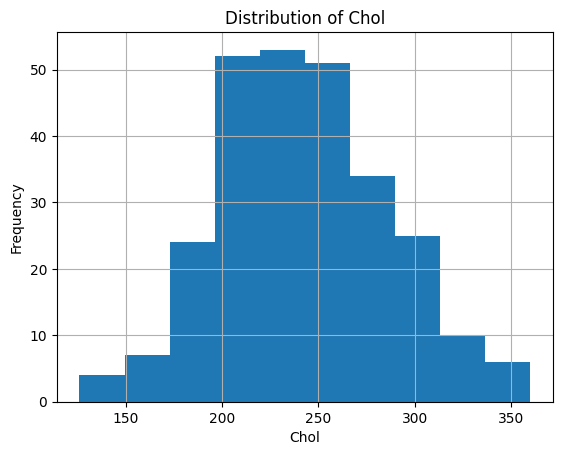

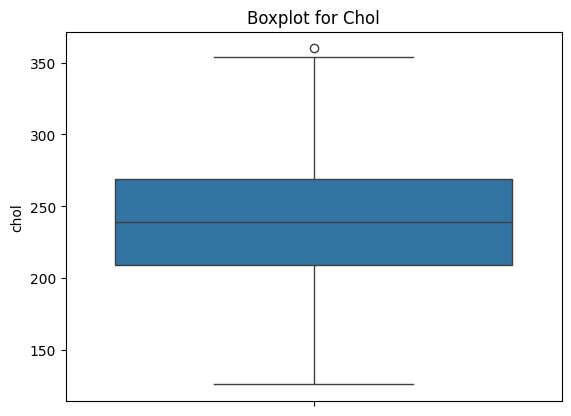

In [ ]:
# Histogram for 'chol'
cleveland_df['chol'].hist(bins=10)
plt.title('Distribution of Chol')
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['chol'])
plt.title('Boxplot for Chol')
plt.show()


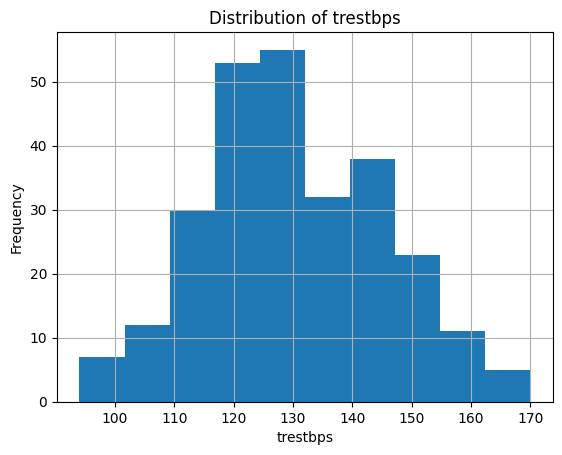

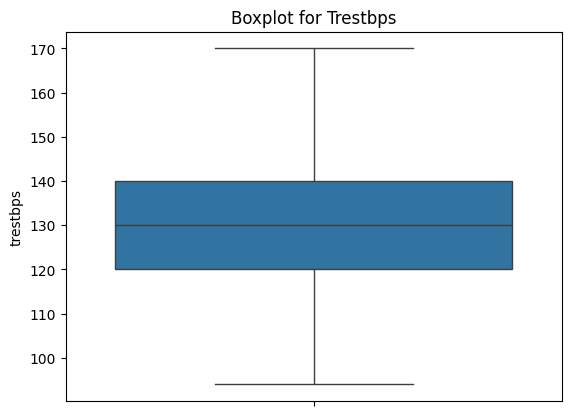

In [ ]:
# Histogram for 'trestbps'
cleveland_df['trestbps'].hist(bins=10)
plt.title('Distribution of trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['trestbps'])
plt.title('Boxplot for Trestbps')
plt.show()


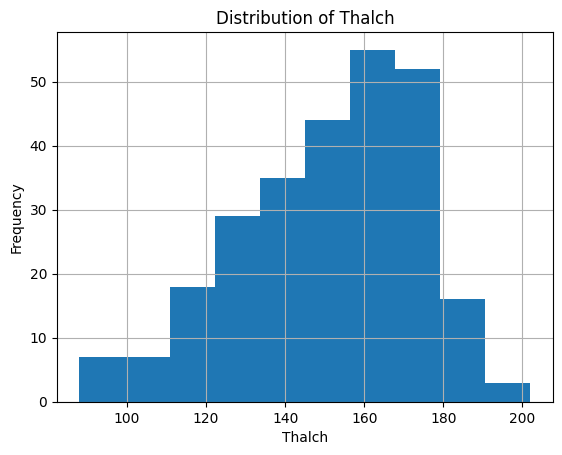

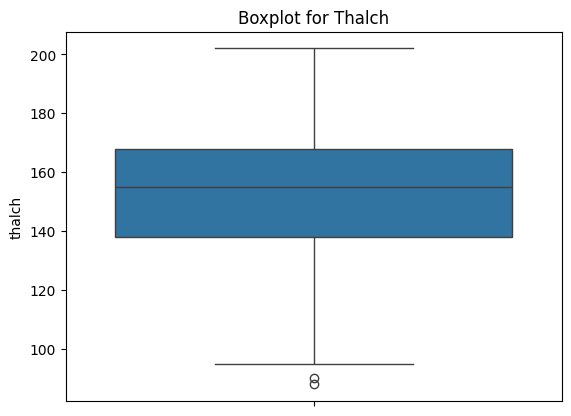

In [20]:
# Histogram for 'thalch'
cleveland_df['thalch'].hist(bins=10)
plt.title('Distribution of Thalch')
plt.xlabel('Thalch')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['thalch'])
plt.title('Boxplot for Thalch')
plt.show()


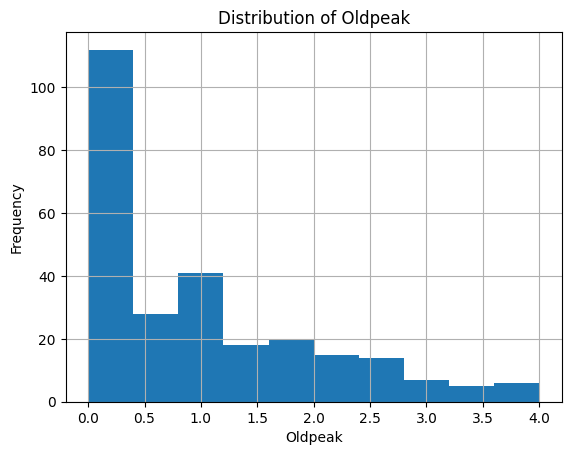

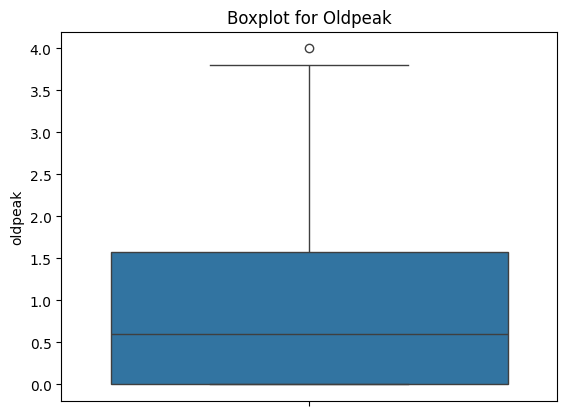

In [21]:
# Histogram for 'oldpeak'
cleveland_df['oldpeak'].hist(bins=10)
plt.title('Distribution of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['oldpeak'])
plt.title('Boxplot for Oldpeak')
plt.show()


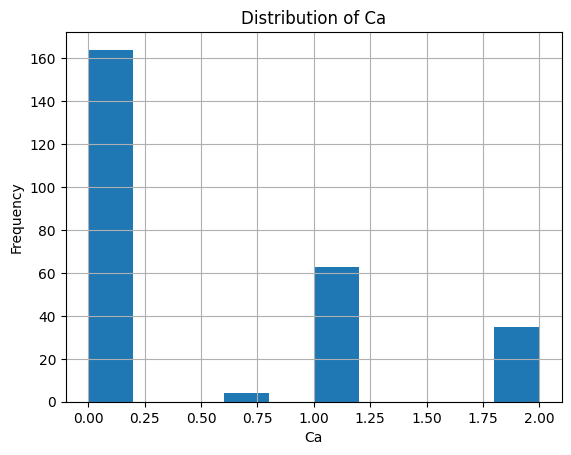

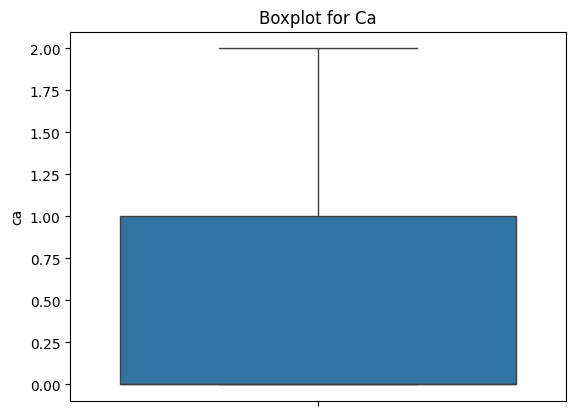

In [22]:
# Histogram for 'ca'
cleveland_df['ca'].hist(bins=10)
plt.title('Distribution of Ca')
plt.xlabel('Ca')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['ca'])
plt.title('Boxplot for Ca')
plt.show()


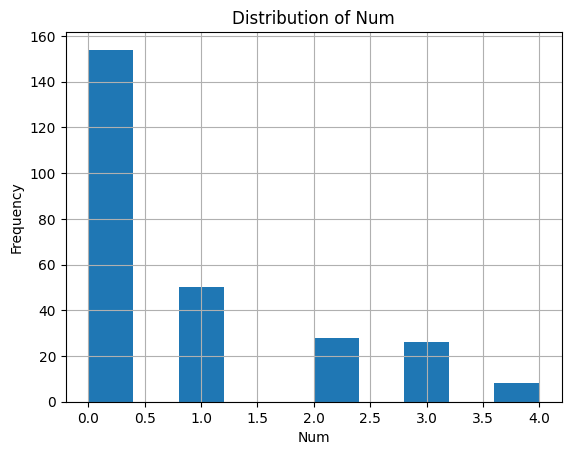

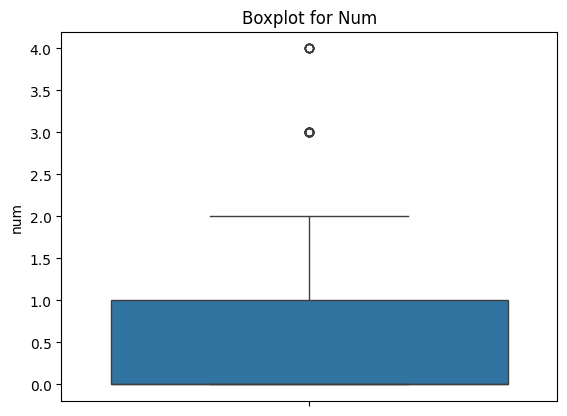

In [23]:
# Histogram for 'num'
cleveland_df['num'].hist(bins=10)
plt.title('Distribution of Num')
plt.xlabel('Num')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=cleveland_df['num'])
plt.title('Boxplot for Num')
plt.show()


### Data Cleaning

Drop id and dataset columns

In [6]:
# Drop id and dataset columns, dataset is uniform and invaluable
cleveland_df.drop(columns=['dataset'], inplace=True)

Check for missing numerical data

In [7]:
# Replace missing numerical values with mean
num_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
# Check for missing numerical values
print("Missing Numerical Value Totals:")
print(cleveland_df[num_columns].isnull().sum())

Missing Numerical Value Totals:
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          5
dtype: int64


Replace all missing numerical data

In [8]:
# Replace missing values with mean via imputation
cleveland_df[num_columns] = cleveland_df[num_columns].fillna(cleveland_df[num_columns].mean())

# Verify if all missing values are replaced
print("Missing Numerical Value Totals:")
print(cleveland_df[num_columns].isnull().sum())

Missing Numerical Value Totals:
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64


Check Categorical Attributes

In [9]:
# place categorical columns in variable
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Check for unique values in categorical columns
for col in cat_columns:
    print(f"Unique values in {col}:")
    print(cleveland_df[col].unique())
    print()


Unique values in sex:
['Male' 'Female']

Unique values in cp:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Unique values in fbs:
[ True False]

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in exang:
[False  True]

Unique values in slope:
['downsloping' 'flat' 'upsloping' nan]

Unique values in thal:
['fixed defect' 'normal' 'reversable defect' nan]



Remove Null Categorical Values

In [10]:
# remove missing values in categorical columns
cleveland_df.dropna(subset=cat_columns, inplace=True)
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        301 non-null    int64  
 1   age       301 non-null    int64  
 2   sex       301 non-null    object 
 3   cp        301 non-null    object 
 4   trestbps  301 non-null    int64  
 5   chol      301 non-null    int64  
 6   fbs       301 non-null    bool   
 7   restecg   301 non-null    object 
 8   thalch    301 non-null    int64  
 9   exang     301 non-null    bool   
 10  oldpeak   301 non-null    float64
 11  slope     301 non-null    object 
 12  ca        301 non-null    float64
 13  thal      301 non-null    object 
 14  num       301 non-null    int64  
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 33.5+ KB


Finding Outliers

In [11]:
# Outliers via IQR method
Q1 = cleveland_df[num_columns].quantile(0.25)
Q3 = cleveland_df[num_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = (cleveland_df[num_columns] < (Q1 - 1.5 * IQR)) | (cleveland_df[num_columns] > (Q3 + 1.5 * IQR))

# Show the rows with outliers
outlier_rows = cleveland_df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outlier_rows.shape[0]}")


Number of rows with outliers: 35


Remove Outliers

In [ ]:
# Remove outliers
cleveland_df = cleveland_df[~outliers.any(axis=1)]
print(f"dataset shape after removing outliers: {cleveland_df.shape}")
cleveland_df.info()

dataset shape after removing outliers: (266, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        266 non-null    int64  
 1   age       266 non-null    int64  
 2   sex       266 non-null    object 
 3   cp        266 non-null    object 
 4   trestbps  266 non-null    int64  
 5   chol      266 non-null    int64  
 6   fbs       266 non-null    bool   
 7   restecg   266 non-null    object 
 8   thalch    266 non-null    int64  
 9   exang     266 non-null    bool   
 10  oldpeak   266 non-null    float64
 11  slope     266 non-null    object 
 12  ca        266 non-null    float64
 13  thal      266 non-null    object 
 14  num       266 non-null    int64  
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 29.6+ KB


Categorical Data Transformation

In [ ]:
# convert cateogorical data into numerical data
cleveland_df['sex'] = cleveland_df['sex'].map({'Male': 0, 'Female': 1})
cleveland_df['cp'] = cleveland_df['cp'].map({'typical angina': 1, 'asymptomatic': 2, 'non-anginal': 3, 'atypical angina': 4})
cleveland_df['fbs'] = cleveland_df['fbs'].map({False: 0, True: 1})
cleveland_df['restecg'] = cleveland_df['restecg'].map({'lv hypertrophy': 1, 'normal': 2, 'stt abnormality': 3})
cleveland_df['exang'] = cleveland_df['exang'].map({False: 0, True: 1})
cleveland_df['slope'] = cleveland_df['slope'].map({'downsloping': 1, 'flat': 2, 'upsloping': 3})
cleveland_df['thal'] = cleveland_df['thal'].map({'fixed defect': 1, 'normal': 2, 'reversible defect': 3})

cleveland_df.info()

In [ ]:
# Handle missing values in 'restecg' column by filling with the mode
cleveland_df['restecg'] = cleveland_df['restecg'].fillna(cleveland_df['restecg'].mode()[0])

# Handle missing values in 'thal' column by filling with the mode
cleveland_df['thal'] = cleveland_df['thal'].fillna(cleveland_df['thal'].mode()[0])

cleveland_df.info()